<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/>

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;

<div align="center"> 
<font size=6> DXFs </font>
</div>

<div align="center"> 
<font size=5> ejemplos de dibujos Hatch </font>
</div>


# Modules

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
import ezdxf


from py_aocg.dxf_hatch import DXF_mask_hatch
from py_aocg.dxf_hatch import mm, um, nm, inches

# Definitions

In [34]:
mm = 1.
inches = 25.4*mm
um = mm/1000
nm = um/1000
degrees = np.pi/180

In [35]:
dxf_params = dict(
    version="R2000",
    total_size=1*inches,
    num_masks=(1,1),
    line_size=1*um,
    hatch_style= ezdxf.const.HATCH_STYLE_NESTED,
    color= 7,
)

# Rectangle

In [36]:
cutting_dict = dict(
                    r0 = (0,0),
                    type = 'circular',
                    size = 1*inches,
                    )

# Rectangle

In [37]:
mask = DXF_mask_hatch(filename="240303 rectangle", 
                cutting_dict=cutting_dict)


mask.rectangle(r0=(0,0), size=(200*um, 100*um), angle=45*degrees,  origin='0' , 
                rotation_point=None)



In [38]:

mask.save()

240303 rectangle.png


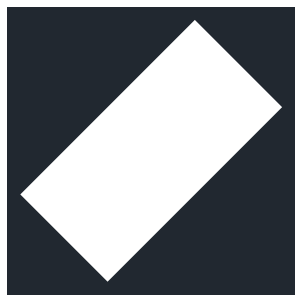

In [39]:
mask.draw()

## Rectangles 

In [40]:
size = 4*mm, 2*mm
r0 = np.array((0*mm, 0*mm))
radius = 0.4*mm

x = np.linspace(-4*mm, 4*mm, 20)
y = np.linspace(-4*mm, 4*mm, 20)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
XY = np.array((X, Y)).transpose()

r_max = np.linspace(50*um,250*um, len(x))
r_min = np.linspace(50*um,250*um, len(y))
R_max, R_min = np.meshgrid(r_max, r_min)
R_max = R_max.flatten()
R_min = R_min.flatten()




240303 rectangles.png


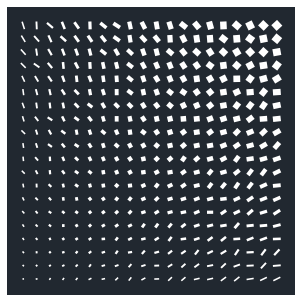

In [41]:
mask = DXF_mask_hatch(filename="240303 rectangles", 
                cutting_dict=cutting_dict)


for i, xy in enumerate(XY):
    
    angle=np.random.rand()
    mask.rectangle(r0=xy, size=(R_max[i], R_min[i]), angle=angle)


mask.draw()
mask.save()

# Circle

240303 circle.png


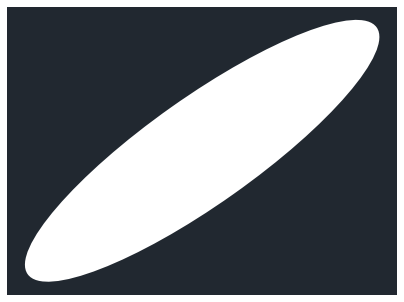

In [42]:
mask = DXF_mask_hatch(filename="240303 circle", 
                cutting_dict=cutting_dict)


mask.circle(r0=(0,0), radii=(200*um, 50*um), angle=45*degrees)


mask.draw()
mask.save()

## Draw circles


In [43]:
size = 4*mm, 2*mm
r0 = np.array((0*mm, 0*mm))
radius = 0.4*mm

x = np.linspace(-4*mm, 4*mm, 10)
y = np.linspace(-2*mm, 2*mm, 5)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
XY = np.array((X, Y)).transpose()

r_max = np.linspace(50*um,250*um, len(x))
r_min = np.linspace(50*um,250*um, len(y))
R_max, R_min = np.meshgrid(r_max, r_min)
R_max = R_max.flatten()
R_min = R_min.flatten()




In [44]:
print(R_min)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]


240303 circles.png


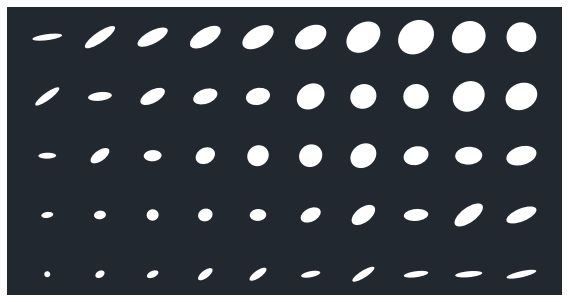

In [45]:
mask = DXF_mask_hatch(filename="240303 circles", 
                cutting_dict=cutting_dict)


for i, xy in enumerate(XY):
    
    angle=np.random.rand()
    mask.circle(r0=xy, radii=(R_max[i], R_min[i]), angle=angle)


mask.draw()
mask.save()


# Inserted circles

[  0.  50. 100. 150. 200. 250. 300. 350. 400. 450. 500.]
240303 circles inside.png


/media/luismiguel/mas_datos/bitbucket/py_aocg/py_aocg/dxf_hatch.py:321: RuntimeWarning: invalid value encountered in scalar divide
  ratio = radii.min()/radii.max()


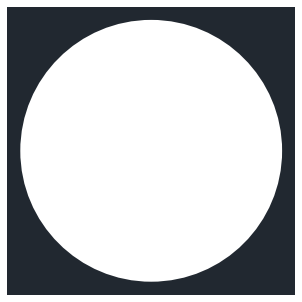

In [46]:
mask = DXF_mask_hatch(filename="240303 circles inside", 
                cutting_dict=cutting_dict)

diameters = np.linspace(0,500,11)
print(diameters)

for d in diameters:
    mask.circle(r0=(0,0), radii=d/2, angle=0)


mask.draw()
mask.save()

240303 circles inside.png


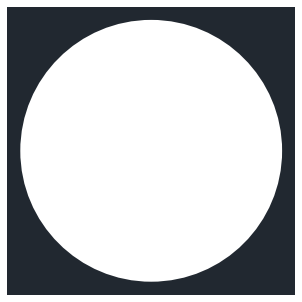

In [47]:
mask = DXF_mask_hatch(filename="240303 circles inside", 
                cutting_dict=cutting_dict)

diameters = np.linspace(0,500,12)

for d in diameters:
    mask.circle(r0=(0,0), radii=d/2, angle=0)


mask.draw()
mask.save()

240303 polyline bulge.png


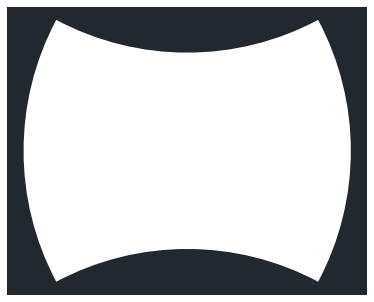

In [48]:
points = [(0,0,-.25), (0,1,.25), (1,1,-.25), (1,0,.25)]

mask = DXF_mask_hatch(filename="240303 polyline bulge", 
                cutting_dict=cutting_dict)


mask.polyline(points)


mask.draw()
mask.save()

240303 polyline.png


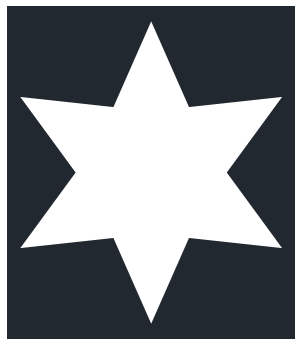

In [49]:
points = ezdxf.render.forms.star(6, r1= 5, r2= 10, rotation = 0*degrees, close = True)

mask = DXF_mask_hatch(filename="240303 polyline", 
                cutting_dict=cutting_dict)


mask.polyline(points)

mask.draw()
mask.save()

# Spline


240303 spline.png


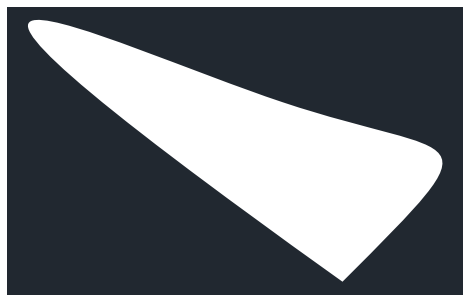

In [51]:
points=[(0, 0),(2, 2),(1, 1),(-7, 5),(0, 0)]

mask = DXF_mask_hatch(filename="240303 spline", cutting_dict=cutting_dict)

mask.spline(points)

mask.draw()
mask.save()

# FZP

240303 FPZ.png


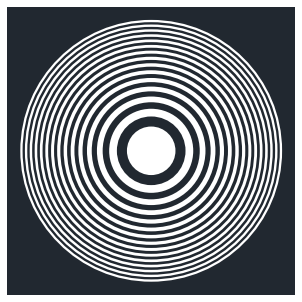

In [54]:

mask = DXF_mask_hatch(filename="240303 FPZ", cutting_dict=cutting_dict)

# mask.background(r0=(0,0), size=(.25, .25))

mask.fresnel_zonal_plate(r0=(0,0), focal=1*mm, wavelength=0.5*um, 
                         diameter=.25*mm, kind='+')

mask.draw()
mask.save()

# Petal lens

240303 petal lens.png


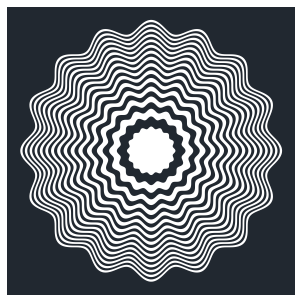

In [55]:
mask = DXF_mask_hatch(filename="240303 petal lens", cutting_dict=cutting_dict)

mask.edof_daisy(r0=(0,0), focal=1*mm, delta_f = 0.2*mm,
                         wavelength=0.5*um, 
                         diameter=.25*mm, num_petals=16)

mask.draw()
mask.save()

240303 lotus.png


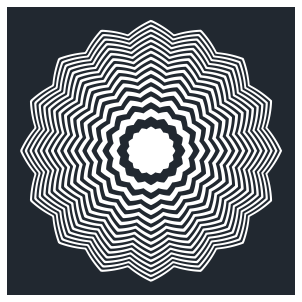

In [56]:
mask = DXF_mask_hatch(filename="240303 lotus", cutting_dict=cutting_dict)

mask.edof_lotus(r0=(0,0), focal=1*mm, delta_f = 0.2*mm,
                         wavelength=0.5*um, 
                         diameter=.25*mm, num_petals=16)

mask.draw()
mask.save()

240303 fourier.png


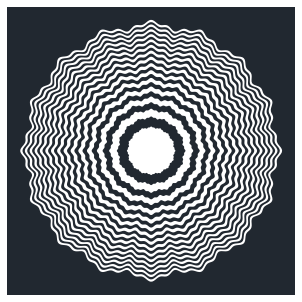

In [57]:
coefs=np.array([[1, 0.5], [3,0.25]])

mask = DXF_mask_hatch(filename="240303 fourier", cutting_dict=cutting_dict)

mask.edof_fourier(r0=(0,0), focal=1*mm, delta_f = 0.2*mm, coefs=coefs,
                         wavelength=0.5*um, diameter=.25*mm, num_petals=16)

mask.draw()
mask.save()

# Photon sieve

240303 photon_sieve.png


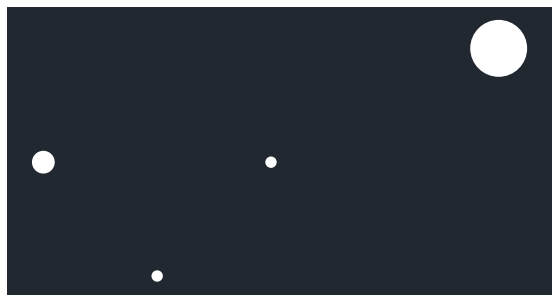

In [59]:
XY=[[0,0], [1,1], [-1,1], [3,2]]
radii = [0.05, 0.05, .1, 0.25]



mask = DXF_mask_hatch(filename="240303 photon_sieve", cutting_dict=cutting_dict)

mask.photon_sieve(r0=[0,0], XY=XY, radii=radii)

mask.draw()
mask.save()